In [1]:
import librosa
import pandas as pd
import numpy as np
from IPython.lib.display import Audio
from matplotlib import pyplot as plt
import multiprocessing
import scipy.signal
from scipy.fft import fft

In [2]:
data_dir = r"C:\Users\Jayde\Desktop\library\bird_songs\data\bird_songs"


anno = pd.read_csv(f'{data_dir}/annotations.csv')

audio = []
#adding the audio data to the dataframe
for _, row in anno.iterrows():
    recording, sr = librosa.load(f'{data_dir}/audio/{row.filename}', sr=None)
    audio.append(recording)
    
anno['audio'] = audio

In [3]:
sample_rate = 44100

In [4]:
anno.head()

,filename,Aegcau_call,Alaarv_song,Anttri_song,Butbut_call,Carcan_call,Carcan_song,Carcar_call,Carcar_song,Cerbra_call,...,Sylund_call,Sylund_song,Tetpyg_song,Tibtom_song,Trotro_song,Turmer_call,Turmer_song,Turphi_call,Turphi_song,audio
0,nips4b_birds_trainfile001.wav,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0.0, -0.00048828125, -0.0009765625, 0.0004882..."
1,nips4b_birds_trainfile002.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0.0, 0.00048828125, 0.0, 0.00048828125, 0.000..."
2,nips4b_birds_trainfile003.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.00048828125, 0.00048828125, 0.001953125, 0..."
3,nips4b_birds_trainfile004.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,"[-0.00048828125, -0.00048828125, -0.0034179688..."
4,nips4b_birds_trainfile005.wav,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,"[0.0024414062, 0.0053710938, 0.00390625, 0.004..."


In [5]:
audio =anno.at[2,'audio']
Audio(audio, rate=sample_rate)

In [6]:
#librosa.display.waveshow(audio, sr=sample_rate, linewidth = 0.1)

In [7]:
def plot_t_and_f_reps(signal, fs, lw=0.1, fmax=6e3):
    fmax = fs/2 #nyquist frequency 
    N = len(signal)
    delta_t = 1 / fs
    times = np.arange(0, N) / fs
    signalf = fft(signal)
    freqs = np.linspace(0.0, 1.0/(2.0*delta_t), N//2)
    
    fig, axs = plt.subplots(1,2, figsize=(20,5))
    axs[0].plot(times, signal, linewidth=lw)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude')
    axs[0].set_title('Time Domain Representation')
    
    axs[1].plot(freqs, 2.0/N * np.abs(signalf[0:N//2]), linewidth=0.4)
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].set_title('Frequency Domain Representation')
    axs[1].set_xlim([0, fmax])
    
    plt.show()

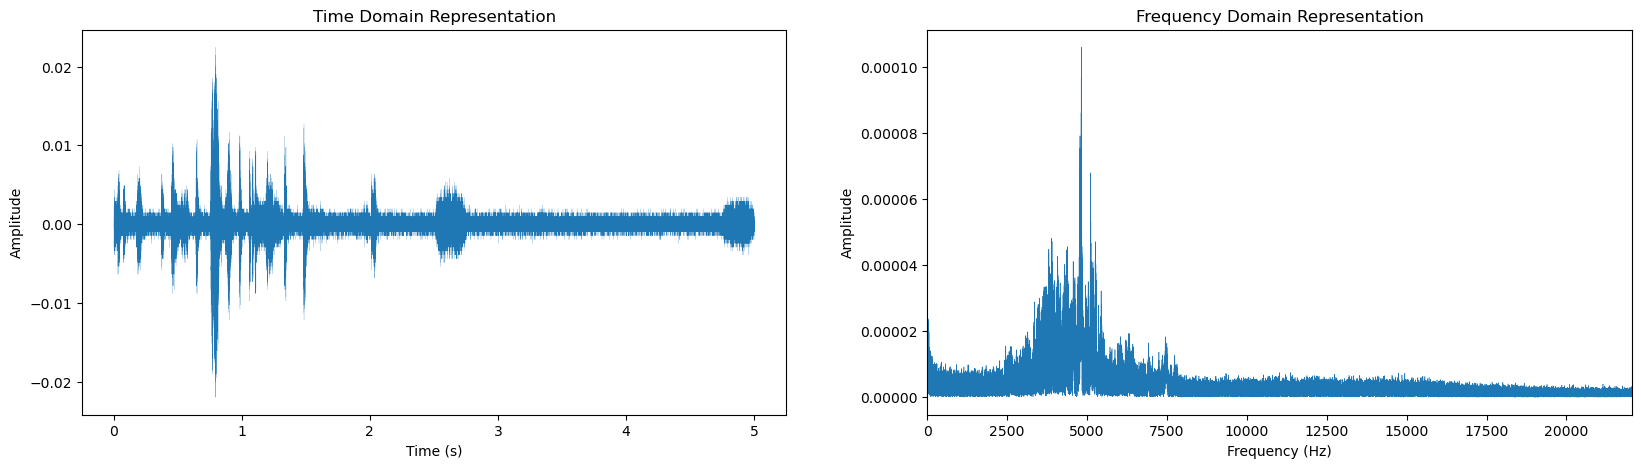

In [8]:
plot_t_and_f_reps(audio, sample_rate)

In [36]:
Audio(audio, rate=sample_rate)

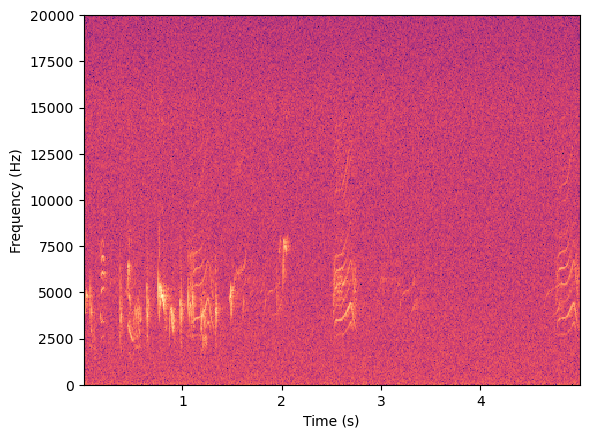

In [40]:
from scipy.signal import spectrogram

f_bins, t_bins, Sxx = spectrogram(audio, fs=sample_rate,
                                 window='hann', nperseg=1024,
                                 noverlap=1024-512, detrend=False,
                                 scaling='spectrum')
plt.pcolormesh(t_bins, f_bins, 20*np.log10(Sxx+1e-100), cmap='magma')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylim([0, 2e4])
plt.show()